data from https://www.kaggle.com/c/GiveMeSomeCredit <br>

Binary Classification to predict credit card default <br>
Default (class-1) or not default  (class-0) <br>
Learning Objective: <br>
1. DecisionTreeClassifier
2. RandomForestClassifier
3. KNeighborsClassifier 


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

from sklearn.model_selection import GridSearchCV

In [103]:
df = pd.read_csv('cs_data.csv')
df.head()

,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [104]:
df.isnull().sum()

id                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

### Visualised how unbalanced data set is

<AxesSubplot:>

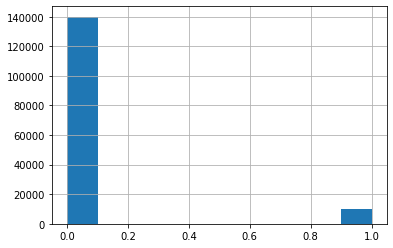

In [106]:
df['SeriousDlqin2yrs'].hist()

In [107]:
(df['SeriousDlqin2yrs']==0).sum()

139974

In [108]:
(df['SeriousDlqin2yrs']==1).sum()

10026

#### Classification Goal: predict 'SeriousDlqin2yrs' (Y) using the other features (X)

In [109]:
X=df.drop(['SeriousDlqin2yrs', 'id'], axis=1)
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [110]:
#Y is the target/class label
Y=df['SeriousDlqin2yrs']
Y.head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: SeriousDlqin2yrs, dtype: float64

In [111]:
X=X.values
Y=Y.values

Split the data into training, validation and testing sets

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
print('train:', X_train.shape, Y_train.shape)
print('validation:', X_val.shape, Y_val.shape)
print('test:', X_test.shape, Y_test.shape)

train: (108000, 10) (108000,)
validation: (12000, 10) (12000,)
test: (30000, 10) (30000,)


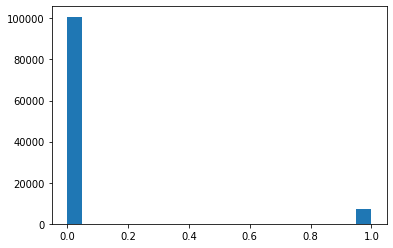

In [113]:
plt.hist(Y_train, bins=20);

In [114]:
(Y_train==0).sum()

100824

In [115]:
(Y_train==1).sum()

7176

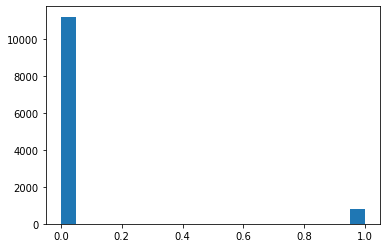

In [116]:
plt.hist(Y_val, bins=20);

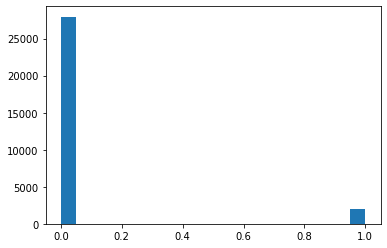

In [117]:
plt.hist(Y_test, bins=20);

In [118]:
#weighted classification accuracy

def weighted_accuracy(confusion):
    M=confusion.copy().astype('float32')
    for k in range(0, M.shape[0]):
        M[k]/=M[k].sum()+1e-8    
    acc = M.diagonal().sum()/M.sum()
    return acc

In [119]:
#feature normalization
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

#### LogisticRegression classifier as baseline model

In [120]:
LR=LogisticRegression(penalty='none', class_weight='balanced', solver='newton-cg', random_state=0)
LR.fit(X_train, Y_train)
Y_val_pred=LR.predict(X_val)
confusion_val=confusion_matrix(Y_val, Y_val_pred)
acc_val=weighted_accuracy(confusion_val)
Y_test_pred=LR.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)
acc_test=weighted_accuracy(confusion_test)
print('classification accuracy on validation set is ', acc_val)
print('classification accuracy on test set is ', acc_test)

classification accuracy on validation set is  0.7163831
classification accuracy on test set is  0.7099812


### DecisionTreeClassifier

In [121]:
DTC=DecisionTreeClassifier(max_depth=20, class_weight='balanced', random_state=0)
DTC.fit(X_train, Y_train)
Y_val_pred=DTC.predict(X_val)
confusion_val=confusion_matrix(Y_val, Y_val_pred)
acc_val=weighted_accuracy(confusion_val)
Y_test_pred=DTC.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)
acc_test=weighted_accuracy(confusion_test)
print('classification accuracy on validation set is ', acc_val)
print('classification accuracy on test set is ', acc_test)

classification accuracy on validation set is  0.67388946
classification accuracy on test set is  0.66793966


#### Random forest

In [125]:
RFC=RandomForestClassifier(n_estimators=20, class_weight='balanced', max_depth=20,random_state=0)
RFC.fit(X_train, Y_train)
Y_val_pred=RFC.predict(X_val)
confusion_val=confusion_matrix(Y_val, Y_val_pred)
acc_val=weighted_accuracy(confusion_val)
Y_test_pred=RFC.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)
acc_test=weighted_accuracy(confusion_test)
print('classification accuracy on validation set is ', acc_val)
print('classification accuracy on test set is ', acc_test)

classification accuracy on validation set is  0.64186645
classification accuracy on test set is  0.6335782


## Model Selection (hyper-parameter optimization) using grid search

### 1. find the best max_depth in DecisionTreeClassifier

In [30]:
max_depth_list=np.arange(1,21)
max_depth_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [127]:
acc_train_list=[]
acc_val_list=[]
for i in range(0,len(max_depth_list)):
    DTC=DecisionTreeClassifier(max_depth=max_depth_list[i], class_weight='balanced', random_state=0)
    DTC.fit(X_train, Y_train)
    Y_train_pred=DTC.predict(X_train)
    confusion_train=confusion_matrix(Y_train, Y_train_pred)
    acc_train=weighted_accuracy(confusion_train)
    
    Y_val_pred=DTC.predict(X_val)
    confusion_val=confusion_matrix(Y_val, Y_val_pred)
    acc_val=weighted_accuracy(confusion_val)
    
    acc_train_list.append(acc_train)
    acc_val_list.append(acc_val)
print(acc_train_list)
print(acc_val_list)



[0.65631753, 0.7399707, 0.75633985, 0.75633985, 0.76042813, 0.7648474, 0.77131504, 0.7753135, 0.7848279, 0.79350984, 0.80402136, 0.81340575, 0.8253664, 0.8362503, 0.84988177, 0.8649971, 0.87960017, 0.8957039, 0.91043365, 0.9246937]
[0.65460956, 0.7337307, 0.7509314, 0.7509314, 0.75495356, 0.7536156, 0.75441754, 0.7538059, 0.7580826, 0.75636005, 0.7519279, 0.74839675, 0.7400179, 0.73465526, 0.7214458, 0.71311927, 0.7065429, 0.6897093, 0.6826336, 0.67388946]


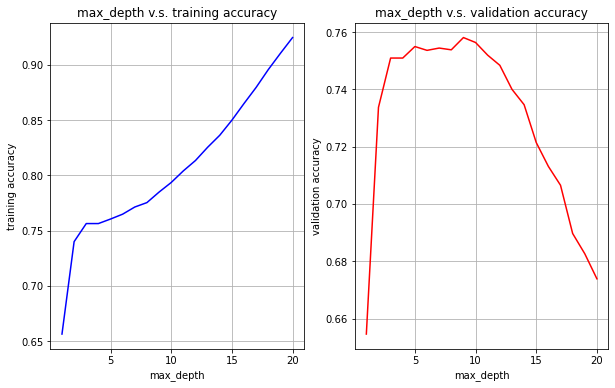

In [128]:
#Visualise training and validation accuracy vs max depth
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(max_depth_list, acc_train_list, 'b')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('training accuracy')
ax[0].set_title('max_depth v.s. training accuracy')
ax[0].grid(True)
ax[1].plot(max_depth_list, acc_val_list, 'r')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('validation accuracy')
ax[1].set_title('max_depth v.s. validation accuracy')
ax[1].grid(True)

In [129]:
#Optimal max depth
max_depth_best=max_depth_list[np.argmax(acc_val_list)]
max_depth_best

9

In [45]:
# Train DTC with optimal max depth then test
DTC=DecisionTreeClassifier(max_depth=max_depth_best, class_weight='balanced', random_state=0)
DTC.fit(X_train, Y_train)

Y_test_pred=DTC.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)
acc_test=weighted_accuracy(confusion_test)

print('classification accuracy on test set is ', acc_test)

classification accuracy on test set is  0.7418347


In [46]:
confusion_test=confusion_matrix(Y_test, Y_test_pred)
confusion_test

array([[23402,  4555],
       [  722,  1321]])

### Optimal max_depth in RandomForestClassifier

In [47]:
max_depth_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [48]:
#train a RandomForestClassifier with max_depth in max_depth_list
acc_train_list=[]
acc_val_list=[]
for i in range(0,len(max_depth_list)):
    RFC=RandomForestClassifier(n_estimators=20, class_weight='balanced', max_depth=max_depth_list[i],random_state=0)
    RFC.fit(X_train, Y_train)
    Y_train_pred=RFC.predict(X_train)
    confusion_train=confusion_matrix(Y_train, Y_train_pred)
    acc_train=weighted_accuracy(confusion_train)
    
    Y_val_pred=RFC.predict(X_val)
    confusion_val=confusion_matrix(Y_val, Y_val_pred)
    acc_val=weighted_accuracy(confusion_val)
    
    acc_train_list.append(acc_train)
    acc_val_list.append(acc_val)
print(acc_train_list)
print(acc_val_list)

[0.6969032, 0.7142781, 0.7543082, 0.7569104, 0.7616317, 0.7652793, 0.77078795, 0.7743684, 0.77907044, 0.78898585, 0.8011172, 0.8124639, 0.8240411, 0.8405075, 0.85468435, 0.8723147, 0.88671863, 0.8958057, 0.91449517, 0.9252142]
[0.68939745, 0.7140273, 0.75247127, 0.75285804, 0.7580126, 0.75591123, 0.7605726, 0.76106584, 0.7599665, 0.7565908, 0.755299, 0.74350154, 0.7362355, 0.72682124, 0.70639443, 0.69830287, 0.68610924, 0.6779498, 0.6534811, 0.64186645]


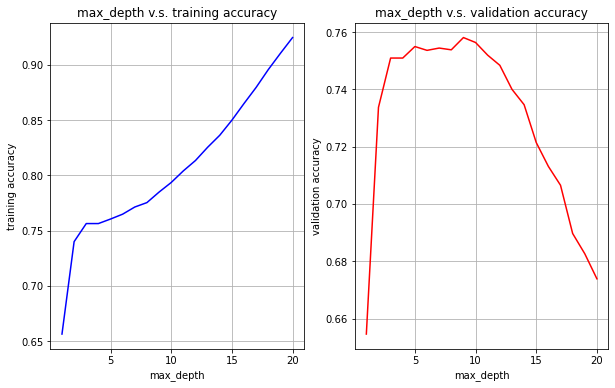

In [130]:
#plot max_depth vs acc_train using max_depth_list and acc_train_list
#plot max_depth vs acc_val using max_depth_list and acc_val_list
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(max_depth_list, acc_train_list, 'b')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('training accuracy')
ax[0].set_title('max_depth v.s. training accuracy')
ax[0].grid(True)
ax[1].plot(max_depth_list, acc_val_list, 'r')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('validation accuracy')
ax[1].set_title('max_depth v.s. validation accuracy')
ax[1].grid(True)

In [50]:
max_depth_best=max_depth_list[np.argmax(acc_val_list)]
max_depth_best

8

In [140]:
#max_depth_best to build a DecisionTreeClassifier
#train it on the training set and evaluate it on the testing set

RFC=RandomForestClassifier(n_estimators=20, class_weight='balanced',max_depth= max_depth_best,random_state=0)
RFC.fit(X_train, Y_train)

Y_test_pred=RFC.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)
acc_test=weighted_accuracy(confusion_test)

print('classification accuracy on test set is ', acc_test)

classification accuracy on test set is  0.74969923


In [141]:
confusion_test

array([[23787,  4170],
       [  718,  1325]])

## KNeighborsClassifier and upsampling

In [ ]:
print('classification accuracy on the testing set is ', acc_test)

In [55]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, Y_train)
Y_test_pred=knn.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)
acc_test=weighted_accuracy(confusion_test)
print('classification accuracy on the testing set is ', acc_test)

classification accuracy on the testing set is  0.5525585


In [148]:
X_train_c0=resample(X_train[Y_train==0], n_samples=100824)
X_train_c1=resample(X_train[Y_train==1], n_samples=100824)

X_train_new=np.concatenate((X_train_c0,X_train_c1))

Y_train_c0=resample(Y_train[Y_train==0], n_samples=100824)
Y_train_c1=resample(Y_train[Y_train==1], n_samples=100824)
Y_train_new=np.concatenate((Y_train_c0,Y_train_c1))

print(X_train_c1.shape,Y_train_c1.shape)
print(X_train_new.shape,Y_train_new.shape)

(100824, 10) (100824,)
(201648, 10) (201648,)


In [73]:
n_neighbors_list=np.arange(1,111,11)
n_neighbors_list

array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100])

In [149]:
acc_train_list=[]
acc_val_list=[]
for i in range(0,len(n_neighbors_list)):
    
    knn = KNeighborsClassifier(n_neighbors = n_neighbors_list[i])
    knn.fit(X_train_new, Y_train_new)
    Y_train_pred_new=knn.predict(X_train_new)
    confusion_train_new=confusion_matrix(Y_train_new, Y_train_pred_new)
    acc_train=weighted_accuracy(confusion_train_new)
    
    Y_val_pred=knn.predict(X_val)
    confusion_val=confusion_matrix(Y_val, Y_val_pred)
    acc_val=weighted_accuracy(confusion_val)
    
    acc_train_list.append(acc_train)
    acc_val_list.append(acc_val)
    print('n_neighbors',n_neighbors_list[i])

n_neighbors 1
n_neighbors 12
n_neighbors 23
n_neighbors 34
n_neighbors 45
n_neighbors 56
n_neighbors 67
n_neighbors 78
n_neighbors 89
n_neighbors 100


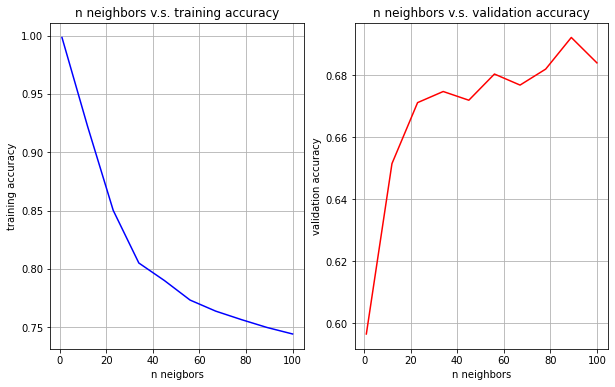

In [151]:
#plot max_depth vs acc_train using max_depth_list and acc_train_list
#plot max_depth vs acc_val using max_depth_list and acc_val_list
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(n_neighbors_list, acc_train_list, 'b')
ax[0].set_xlabel('n neigbors')
ax[0].set_ylabel('training accuracy')
ax[0].set_title('n neighbors v.s. training accuracy')
ax[0].grid(True)
ax[1].plot(n_neighbors_list, acc_val_list, 'r')
ax[1].set_xlabel('n neighbors')
ax[1].set_ylabel('validation accuracy')
ax[1].set_title('n neighbors v.s. validation accuracy')
ax[1].grid(True)

In [152]:
n_neighbors_best=n_neighbors_list[np.argmax(acc_val_list[0:4])]
n_neighbors_best


34

In [153]:
#Use n_neighbors_best to build a KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = n_neighbors_best)
knn.fit(X_train_new, Y_train_new)
Y_test_pred=knn.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)
acc_test=weighted_accuracy(confusion_test)
print('classification accuracy on the testing set is ', acc_test)

classification accuracy on the testing set is  0.6713728


### How to perform grid search if we need to optimize more than one hyper-parameter ?

In [97]:
#as described in Random Forest PhD thesis - Gilles Louppe

#example with random forest
randoforest=RandomForestClassifier(random_state=0)

search_space={
    'n_estimators':[10,20,30],
    'max_depth':[5,10,15,20,25],
    'class_weight':['balanced','balanced_subsample']
}

GS = GridSearchCV(estimator = randoforest,
               param_grid = search_space,
               scoring = ['r2','neg_root_mean_squared_error'],
               refit='r2',
               cv = 5,
               verbose =4)
GS.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END class_weight=balanced, max_depth=5, n_estimators=10; neg_root_mean_squared_error: (test=-0.398) r2: (test=-1.551) total time=   2.1s
[CV 2/5] END class_weight=balanced, max_depth=5, n_estimators=10; neg_root_mean_squared_error: (test=-0.395) r2: (test=-1.513) total time=   1.7s
[CV 3/5] END class_weight=balanced, max_depth=5, n_estimators=10; neg_root_mean_squared_error: (test=-0.408) r2: (test=-1.689) total time=   2.0s
[CV 4/5] END class_weight=balanced, max_depth=5, n_estimators=10; neg_root_mean_squared_error: (test=-0.392) r2: (test=-1.474) total time=   1.5s
[CV 5/5] END class_weight=balanced, max_depth=5, n_estimators=10; neg_root_mean_squared_error: (test=-0.402) r2: (test=-1.610) total time=   1.3s
[CV 1/5] END class_weight=balanced, max_depth=5, n_estimators=20; neg_root_mean_squared_error: (test=-0.400) r2: (test=-1.580) total time=   2.9s
[CV 2/5] END class_weight=balanced, max_depth=5, n_estimators=

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [10, 20, 30]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [99]:
print(GS.best_estimator_)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=25,
                       n_estimators=30, random_state=0)


In [101]:
print(GS.best_params_)

{'class_weight': 'balanced_subsample', 'max_depth': 25, 'n_estimators': 30}
